In [3]:
!python --version

Python 3.9.12


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 이항분포

In [2]:
test = np.random.binomial(1, 0.5, 100000)
(test == 1).mean()

## array의 평균값을 구하면 이항 분포의 기댓값(평균)이 된다.
## n = 1, p = 0.5이므로 평균은 np = 1*0.5 = 0.5

0.50046

In [3]:
test

array([0, 1, 1, ..., 1, 0, 0])

In [4]:
# n = 10, p = 0.15 / 100000번 반복 시행
test = np.random.binomial(10, 0.15, 100000)

# 앞면이 3번 이상 나올 확률
(test >= 3).mean()


## 앞면이 3버 이상 나올 확률은 전체확률에서 앞면이 2번 이하 나올 확률을 빼면 된다.
## 1 - P(X<=2) = 1- {P(X=0) + P(X=1) + P(X=2)}

0.17863

## 베이즈 추정

- 추론 대상의 사전 확률과 추가적인 정보를 기반으로 해당 대상의 사후 확률을 추론하는 통계적 방법을 베이즈추정이라고 한다.


![ㅇㅇ](https://wikimedia.org/api/rest_v1/media/math/render/svg/a9deb72fb98d404146f831e7ba2aa03100cbfc8e)

In [5]:
import pandas as pd
df = pd.read_csv('cancer_test_data.csv')
df.head()

,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False
3,36593,Negative,False
4,53717,Negative,False


In [6]:
## 양성 판정 받은 사람 중 암 환자일 확률 : P(C|P)

df.query('test_result == "Positive"').has_cancer.mean()

0.34282178217821785

In [7]:
# 양성 판정 받은 사람 중 암 환자가 아닐 확률: P(~C|P)

(df.query('test_result == "Positive"')['has_cancer'] == False).mean()

0.6571782178217822

In [8]:
## 음성 판정 받은 사람 중 암 환자일 확률 : P(C|N)
df.query('test_result == "Negative"').has_cancer.mean()

0.013770180436847104

In [9]:
# 음성 판정 받은 사람 중 암 환자가 아닐 확률: P(~C|N)
(df.query('test_result == "Negative"')['has_cancer'] == False).mean()

0.9862298195631529

## 확률 변수, 확률 분포, 확률 표본, 표본 분포

- 관심 대상인 모집단의 특성에 대해 알고자 할때, 모집단 전체를 관찰할 수 없다. 따라서 모집단으로부터 그 일부를 무작위로 뽑아 관측한 결과로부터 모집단 전체의 특성, 즉 모수(Parameter)를 추론하게 되는데, 이렇게 뽑은 모집단의 일부를 표본(Sample)이라고 한다. 추론에는 통계량(Statistic)이라 불리는 표본의 함수가 사용되는데, 통계량의 분포, 즉  표본 분포를 알아야 한다.

- **확률 변수Random Variable**란 무작위 실험을 했을 때, 특정 확률로 발생하는 각각의 결과를 수치 값으로 표현한 변수를 말한다. 그리고 **확률 분포Probability Distribution**란 확률 변수 X의 모든 값과 그에 대응하는 확률 값들의 분포를 말한다. 확률변수 X의 확률분포함수를 F라 하고, F 자체나 F의 모수를 모를 때, X의 관측값들을 통해 모수를 추론하게 된다.

- 만약 독립적으로 관측하여 얻는 n개의 값을 X1, X2, ..., Xn으로 나타낸다면 이들은 서로 독립(independent)이고 X와 같은 분포 F를 따르게(identically distributed) 될 것이다. 
> 이를 동일분포, 독립분포라고 하며 줄여서 iid(independent, identically distributed)라고 표기한다.
- 이때 X1, X2, ..., Xn을 확률변수 X에 대한 크기 n인 **확률분포Random Sample**이라고 한다.

- 통계량을 이용하여 모수에 대한 통계적 추론을 하게 되는데 이를 위해서는 통계량이 어떤 분포를 따르는지 알아야 한다. 이때 통계량의 분포를 **표본분포Sampling Distribution**이라고 한다.


- 정규분포를 따르는 모집단으로부터 크기 n인 표본을 추출하여 구한 표본평균의 평균과 분산은 아래와 같다.

![ㅇㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FNVzpy%2FbtqCqNQfLKg%2F8BEri93or5DQh8mFkEgkC0%2Fimg.png)

## 대수의 법칙 Law of Large Numbers

- 대수의 법칙(=라플라스의 정리)이란 표본의 수가 많을수록(=n이 클수록) 표본평균이 모평균에 가까워진다는 이론

In [10]:
## gamma분포로부터 무작위 표본 추출
pop_data = np.random.gamma(1, 100, 3000)

## 모평균
pop_data.mean()

99.91468552591819

In [11]:
## 표본 개수가 5, 20, 100, 10000일 때 표본 평균
np.random.choice(pop_data, 5).mean()

64.25912076789241

In [12]:
np.random.choice(pop_data, 20).mean()

102.99500009482026

In [13]:
np.random.choice(pop_data, 100).mean()

107.5358819774353

In [14]:
np.random.choice(pop_data, 10000).mean()

101.67065662515488

## 중심극한정리 Central Limit Theorem

- n이 클수록 확률 변수의 평균, Proportion, 평균의 차이, Proportion의 차이의 분포는 정규분포에 가까워진다는 이론.
<br></br>
- 분산과 correlation에는 적용 x

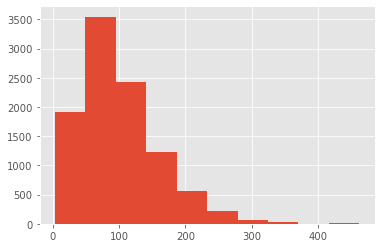

In [20]:
means_size_3 = []

for i in range(10000):
    means_size_3.append(np.random.choice(pop_data, 3).mean())
    
plt.hist(means_size_3)
plt.show()

## n = 3인 경우, n이 충분히 크지 않기 때문에 그래프의 형태는 'right-skewed'

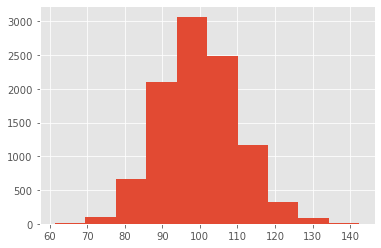

In [24]:
# n = 100인 경우에는 그래프의 형태가 "정규분포"에 가까움

means_size_100 = []

for i in range(10000):
    means_size_100.append(np.random.choice(pop_data, 100).mean())
    
plt.hist(means_size_100)
plt.show()

In [25]:
#  모평균
pop_data.mean()

99.91468552591819

In [26]:
# 표본평균
np.mean(means_size_100)

99.85875704688951

In [27]:
#  모분산
pop_data.var()

10353.344543659623

In [29]:
# 표본분산
np.var(means_size_100)

104.35920106287705

- n = 100인 경우, 모평균과 표본평균은 거의 일치하고, 표본분산은 모분산의 1/100.
- n = 100이기 때문에, 위 공식에 의해 분산 값이 작아짐

## 부트스트랩 Bootstrap

- 현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량을 다시 계산하는 것 (모수의 분포 추정)
> 데이터가 정규분포를 따라야 한다는 가정이 꼭 필요하지 않다

- 1억개의 모집단에서 뽑은 200개의 표본있다고 가정하자. 200개로만 통계량을 구하는 것이 아니라 200개를 기준으로 복원 추출하여 새로운 통계량을 구하는 것.
    - 다음은 부트스트랩으로 신뢰구간을 구하는 절차이다.
        1. 200개의 표본 중 하나를 뽑아 기록하고 다시 제자리로 둔다.
        2. 이를 n번 만큼 반복한다.
        3. n번 재표본추출한 값의 평균을 구한다.
        4. 1~3 단계를 R번 반복. (R : 부트스트랩 반복 횟수)
        5. 평균에 대한 결과 R개를 사용하여 신뢰구간을 구한다.
        
- 표본이 200개밖에 없을지라도 부트스트랩을 통해 200개 보다 더 많은 통계량을 구할 수 있다. 따라서 부트스트랩을 활용하면 **모수를 더 정확히 추정**할 수 있다. (특히 R이 클수록 신뢰구간에 대한 추정은 더 정확해진다)

In [36]:
import os
os.listdir()

['.ipynb_checkpoints',
 'cancer_test_data.csv',
 'coffee_dataset.csv',
 'content',
 '데이터분석.ipynb']

In [37]:
coffe_data = pd.read_csv('coffee_dataset.csv')

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854


In [39]:
coffee_sample = coffe_data.sample(200)
coffee_sample.head(3)

,user_id,age,drinks_coffee,height
952,3028,>=21,True,68.885329
834,4260,>=21,True,70.893510
1186,6749,<21,False,66.439987


In [45]:
coffee_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 952 to 270
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


1. 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이

In [80]:
diffHeightList = []

for _ in range(10000):
    bootstrap_sample = coffee_sample.sample(200, replace = True)
    YesCoffeeHeight = bootstrap_sample[bootstrap_sample.drinks_coffee == True].height.mean()
    NoCoffeeHeight = bootstrap_sample[bootstrap_sample.drinks_coffee == False]['height'].mean()
    Diff = YesCoffeeHeight - NoCoffeeHeight
    diffHeightList.append(Diff)
    
# 신뢰수준 99%인 평균 키 차이에 대한 "신뢰구간"
np.percentile(diffHeightList, 0.5), np.percentile(diffHeightList, 99.5)


## 신뢰수준 99% 평균 키 차이의 결과 "커피를 마시는 사람이 커피를 마시지 않는 사람보다 키가 크다"

(0.11274059535126378, 2.72447173112344)

2. 21살 이상과 21살 미만의 사람들의 평균 키 차이

In [57]:
diffHeightListByAge = []

for _ in range(10000):
    bootstrap_sample = coffee_sample.sample(200, replace = True)
    Over21ByAge = bootstrap_sample[bootstrap_sample.age == ">=21"]['height'].mean()
    Under21ByAge = bootstrap_sample[bootstrap_sample.age == "<21"]['height'].mean()
    Diff = Over21ByAge - Under21ByAge
    diffHeightListByAge.append(Diff)

In [58]:
# 신뢰수준 99%인 평균 키차이에 대한 신뢰구간
np.percentile(diffHeightListByAge, 0.5), np.percentile(diffHeightListByAge, 99.5)


### 신뢰수준 99%로 21살 이상이 21살 미만에 비해 키가 크다!

(3.1771346745952846, 4.896584612298327)

3. 21살 미만의 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이

In [81]:
diffHeightList = []

for _ in range(10000):
    bootstrap_sample = coffee_sample.sample(200, replace = True)
    Under21YesCoffeeHeightMean = bootstrap_sample.query("age == '<21' and drinks_coffee == True").height.mean()
    Under21NoCoffeeHeightMean = bootstrap_sample.query("age == '<21' and drinks_coffee == False").height.mean()
    diff = Under21NoCoffeeHeightMean - Under21YesCoffeeHeightMean
    diffHeightList.append(diff)

In [82]:
# 신뢰수준 99%인 평균 키차이에 대한 신뢰구간
np.percentile(diffHeightList, 0.5), np.percentile(diffHeightList, 99.5)

(0.14571885416064675, 2.4747586600482228)

4. 21살 이상인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이

In [89]:
diffHeightListOver21 = []
for _ in range(iterationNum):
    bootSample = coffee_sample.sample(200, replace=True) # 복원 추출
    nonCoffeeHeightMeanOver21 = bootSample.query("age != '<21' and drinks_coffee == False").height.mean() # 21살 이상이며 커피를 마시지 않는 사람 평균 키
    coffeeHeightMeanOver21 = bootSample.query("age != '<21' and drinks_coffee == True").height.mean() # 21살 이상이며 커피를 마시는 사람 평균 키

    diff = nonCoffeeHeightMeanOver21 - coffeeHeightMeanOver21
    diffHeightListOver21.append(diff)

np.percentile(diffHeightListOver21, 0.5), np.percentile(diffHeightListOver21, 99.5)

### 신뢰수준 99%인 평균 키차이에 대한 신뢰구간이 다음과 같이 나왔다.
### 전체 데이터에서는 커피를 마시는 사람이 커피를 마시지 않는 사람에 비해 평균 키가 컸지만 21살 미만, 이상으로 나누어 계산해보니 모두 커피를 마시지 않는 사람의 평균 키가 컸다.
### 이는 "심슨의 역설"이다.

(nan, nan)

### 모수와 부트스트랩 신뢰구간의 비교

- 신뢰구간을 통해서도 가설검정을 할 수 있다. 부트스트랩을 통해 신뢰구간을 정하고 관측된 값이 신뢰구간 안에 있으면 해당 가설은 참인 것으로 판정 하는 것.

- 데이터를 통해 실제 평균의 차이를 구해 모수가 신뢰구간 안에 있는지 알아보자.

In [79]:
## 1. 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이 (모집단 평균)
df = pd.read_csv('coffee_dataset.csv')

df[df['drinks_coffee'] == True].height.mean() - df[df['drinks_coffee'] == False].height.mean()

1.9568024933369799

In [69]:
## 2. 21살 이상과 21살 미만의 사람들의 평균 키 차이

df[df['age'] == '>=21']['height'].mean() - df[df['age'] == '<21']['height'].mean()

3.88229124992111

In [70]:
## 3. 21살 미만인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이

df.query("age == '<21' and drinks_coffee == False").height.mean() - df.query("age == '<21' and drinks_coffee == True").height.mean()

1.6993900935511732

In [92]:
## 4. 21살 이상인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이

df.query("age != '<21' and drinks_coffee == False").height.mean() - df.query("age != '<21' and drinks_coffee == True").height.mean()

1.9509354889786579

- 각각의 모수 
1.9568024933369799 \
3.88229124992111 \
1.6993900935511732 \
1.9509354889786579

- 신뢰구간
(0.137345845298402, 2.699711565504928) \
(3.1771346745952846, 4.896584612298327) \
(0.14571885416064675, 2.4747586600482228) \
(0.38466991879827656, 3.290024158015461) 

모수가 부트스트랩 신뢰구간 안에 있음

In [94]:
df = pd.read_csv("coffee_dataset.csv")
df.height.mean()

67.59748697307937

## 최소자승법을 활용한 회귀선Regression line Fitting

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("/house_price")